# Analisis data bivariat dan multivariat

## Data bivariat 

Data bivariat mendeskripsikan hubungan antar dua buah variabel. Misalnya:
* Hubungan antara berat dan tinggi badan.
* Hubungan antara risiko penyakit jantung dengan jenis kelamin.
*  dll.

Data bivariat, terdiri dari:
* 2 variabel kualitatif
* 1 variabel kualitatif dan 1 variabel kuantitatif.
* 2 variabel kuantitatif.

### Data bivariat kualitatif

In [1]:
ratings <- factor(c(2,4,3,3,2,1,1,2,3,4,2,3,3,4,1,3,2,4,3,2,1))
ratings 

[1] 2 4 3 3 2 1 1 2 3 4 2 3 3 4 1 3 2 4 3 2 1
Levels: 1 2 3 4

In [2]:
kursus <- factor(c(1,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,1,1,0,1))
kursus

[1] 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1
Levels: 0 1

In [3]:
levels(kursus) <- c('R', 'Python')

In [4]:
table(ratings, kursus)

       kursus
ratings R Python
      1 1      3
      2 3      3
      3 4      3
      4 2      2

In [5]:
table(kursus, ratings)

        ratings
kursus   1 2 3 4
  R      1 3 4 2
  Python 3 3 3 2

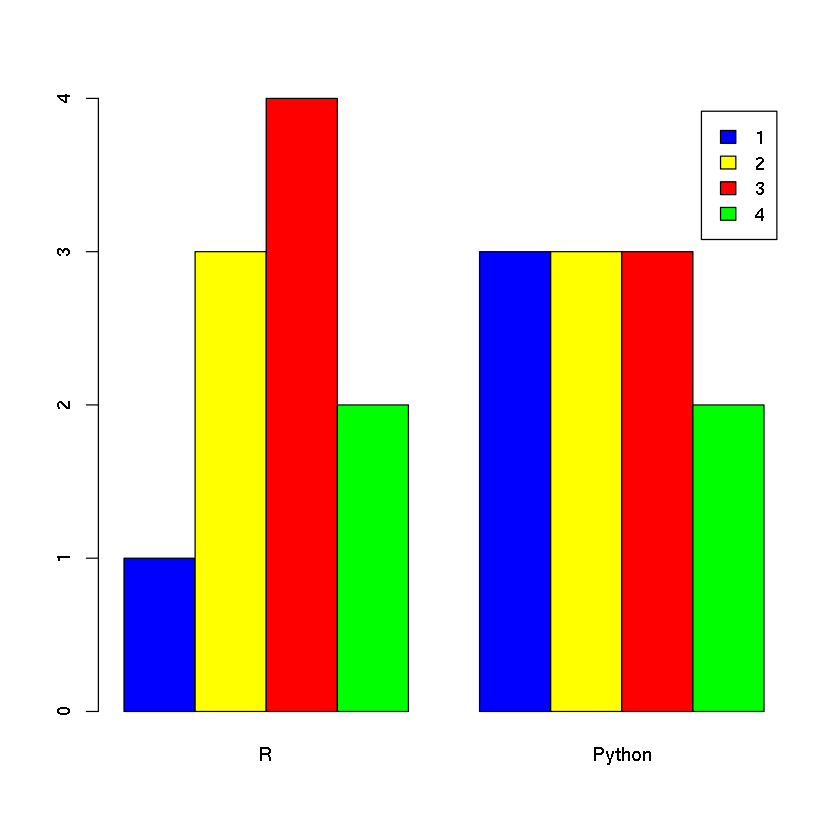

In [6]:
barplot(table(ratings, kursus),
       col=c('blue', 'yellow', 'red', 'green'), legend=T, beside=T)

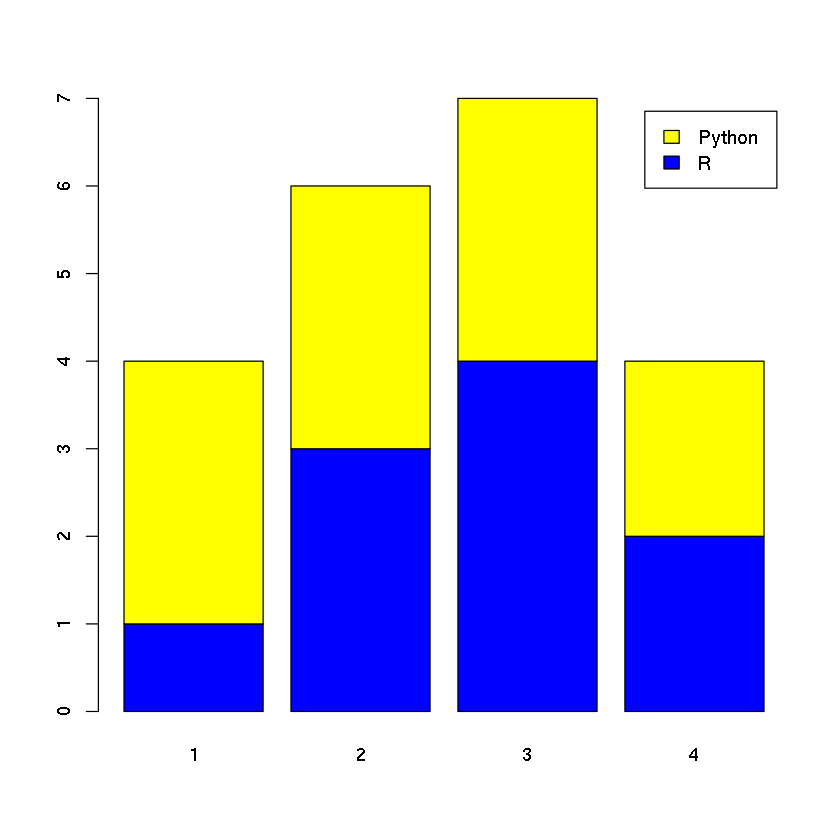

In [7]:
barplot(table(kursus, ratings),
       col=c('blue', 'yellow', 'red', 'green'),
       legend.text=T)

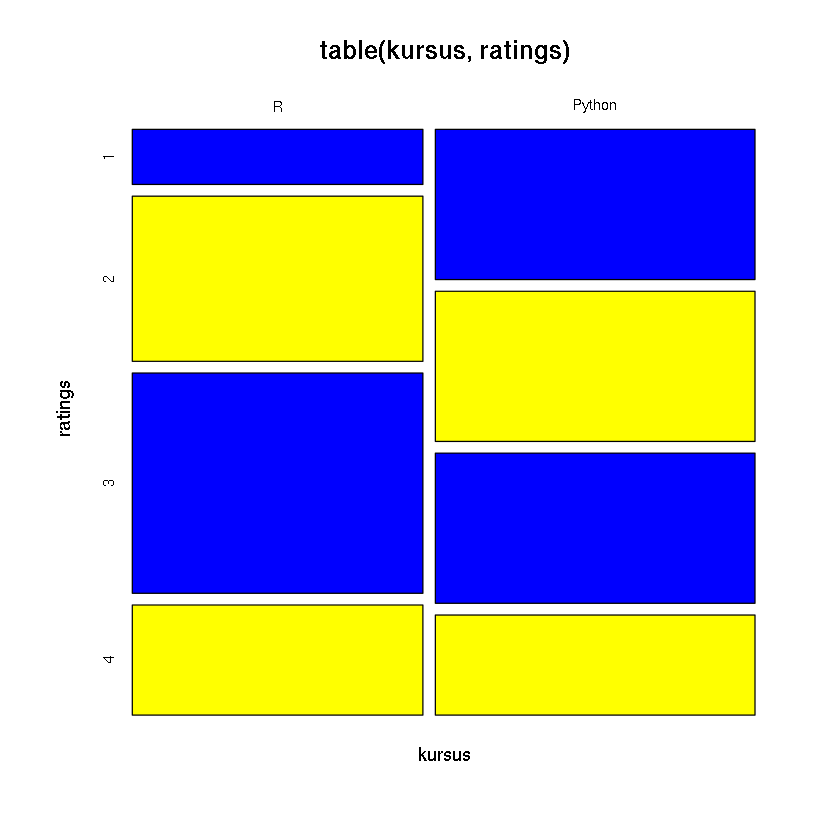

In [8]:
mosaicplot(table(kursus,ratings),
          col=c('blue', 'yellow'))

### Data bivariat kuantitatif

In [13]:
library(dplyr)
df <- read.csv("../data/GEStock.csv")
dates <- select(df, Date)
price <- select(df, Price)

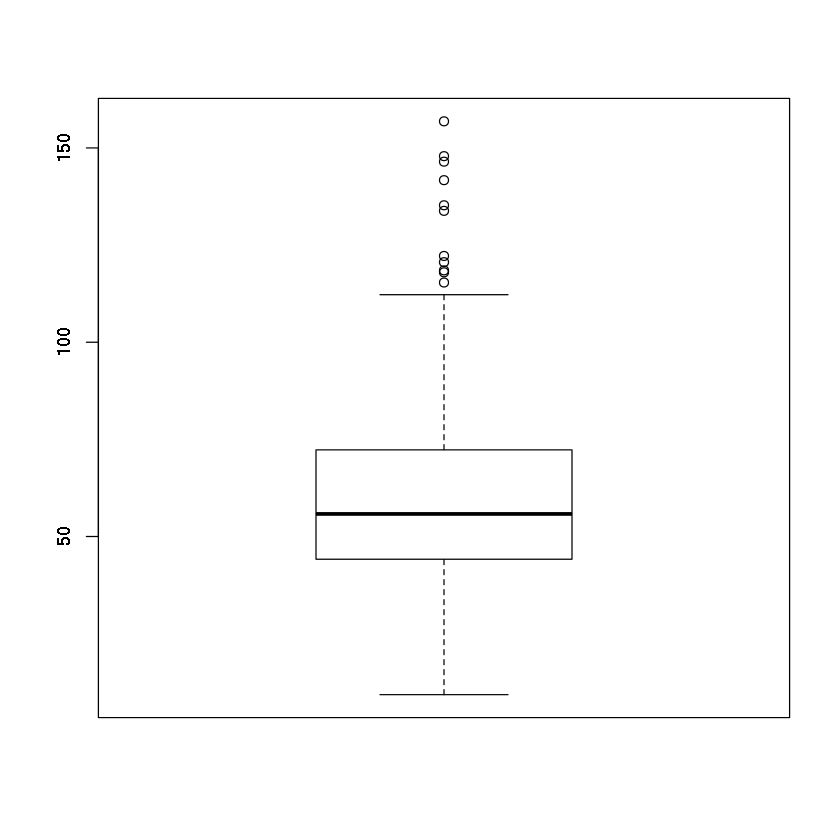

In [15]:
boxplot(price) # hanya untuk univariat

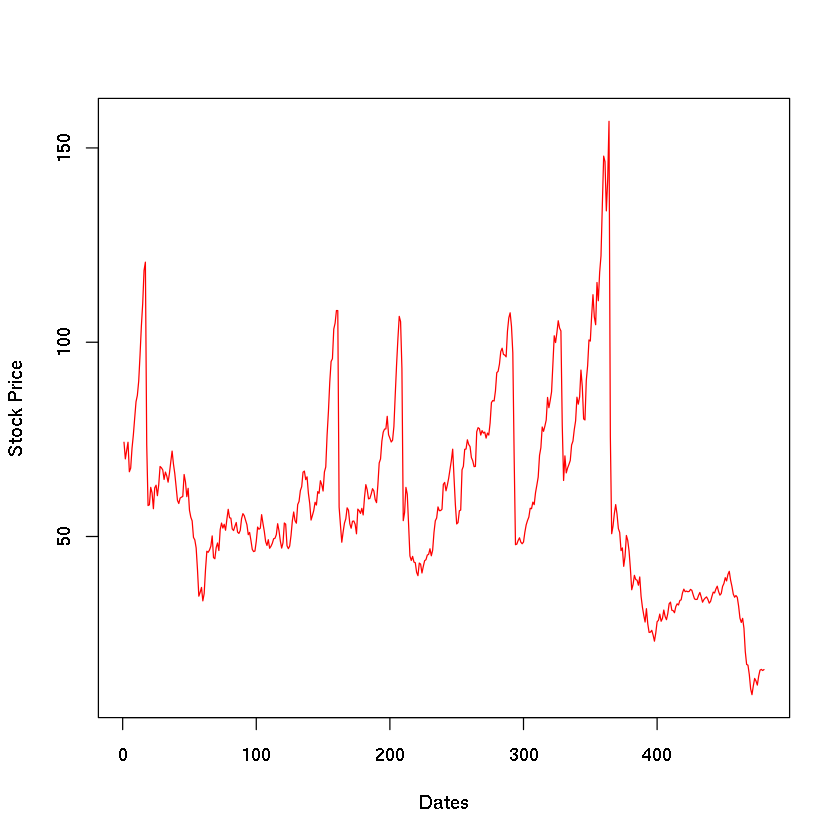

In [16]:
plot(df$Price,
    xlab='Dates',
    ylab='Stock Price',
    col='red',
    type='l')

In [17]:
max(df$Price)

[1] 156.8437

In [19]:
which(df$Price == max(df$Price)) # indeks maksimum

[1] 364

In [20]:
df[which(df$Price == max(df$Price)),]

,Date,Price
364,4/1/00,156.8437


## Data multivariat

In [22]:
df <- read.csv("../data/murders.csv")
head(df)

state,abb,region,population,PopulationDensity,murders,gunmurders,gunownership
Alabama,AL,South,4779736,94.65,199,135,0.517
Arizona,AZ,West,6392017,57.05,352,232,0.311
California,CA,West,37253956,244.20,1811,1257,0.213
Colorado,CO,West,5029196,49.33,117,65,0.347
Connecticut,CT,Northeast,3574097,741.40,131,97,0.167
Florida,FL,South,19687653,360.20,987,669,0.245


In [24]:
str(df)

'data.frame':	25 obs. of  8 variables:
 $ state            : Factor w/ 25 levels "Alabama","Arizona",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ abb              : Factor w/ 25 levels "AL","AZ","CA",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ region           : Factor w/ 4 levels "North Central",..: 3 4 4 4 2 3 3 1 1 3 ...
 $ population       : int  4779736 6392017 37253956 5029196 3574097 19687653 9920000 12830632 6483802 4339367 ...
 $ PopulationDensity: num  94.7 57 244.2 49.3 741.4 ...
 $ murders          : int  199 352 1811 117 131 987 527 453 198 180 ...
 $ gunmurders       : int  135 232 1257 65 97 669 376 364 142 116 ...
 $ gunownership     : num  0.517 0.311 0.213 0.347 0.167 0.245 0.403 0.202 0.391 0.477 ...


In [25]:
summary(df)

         state         abb               region     population      
 Alabama    : 1   AL     : 1   North Central: 6   Min.   : 3574097  
 Arizona    : 1   AZ     : 1   Northeast    : 5   1st Qu.: 5686986  
 California : 1   CA     : 1   South        :11   Median : 6547629  
 Colorado   : 1   CO     : 1   West         : 3   Mean   :10155719  
 Connecticut: 1   CT     : 1                      3rd Qu.:11536504  
 Florida    : 1   FL     : 1                      Max.   :37253956  
 (Other)    :19   (Other):19                                        
 PopulationDensity    murders         gunmurders      gunownership   
 Min.   :  49.33   Min.   : 117.0   Min.   :  65.0   Min.   :0.1230  
 1st Qu.: 105.00   1st Qu.: 199.0   1st Qu.: 135.0   1st Qu.:0.2130  
 Median : 182.50   Median : 419.0   Median : 286.0   Median :0.3510  
 Mean   : 282.57   Mean   : 483.4   Mean   : 329.9   Mean   :0.3305  
 3rd Qu.: 285.30   3rd Qu.: 527.0   3rd Qu.: 376.0   3rd Qu.:0.4170  
 Max.   :1189.00   Max.   :1

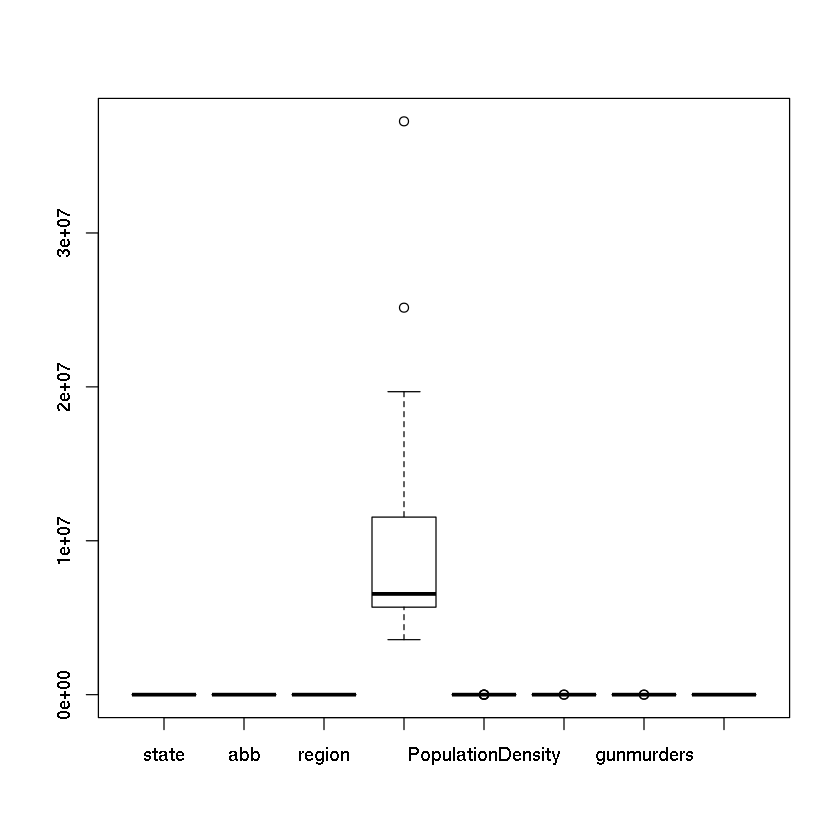

In [26]:
boxplot(df)

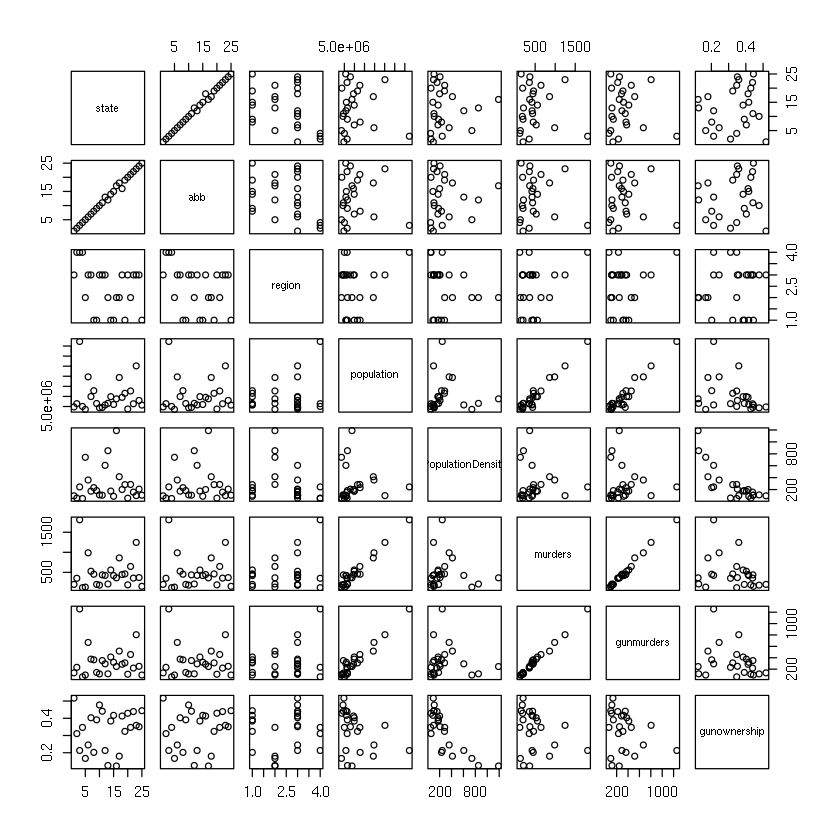

In [27]:
plot(df)

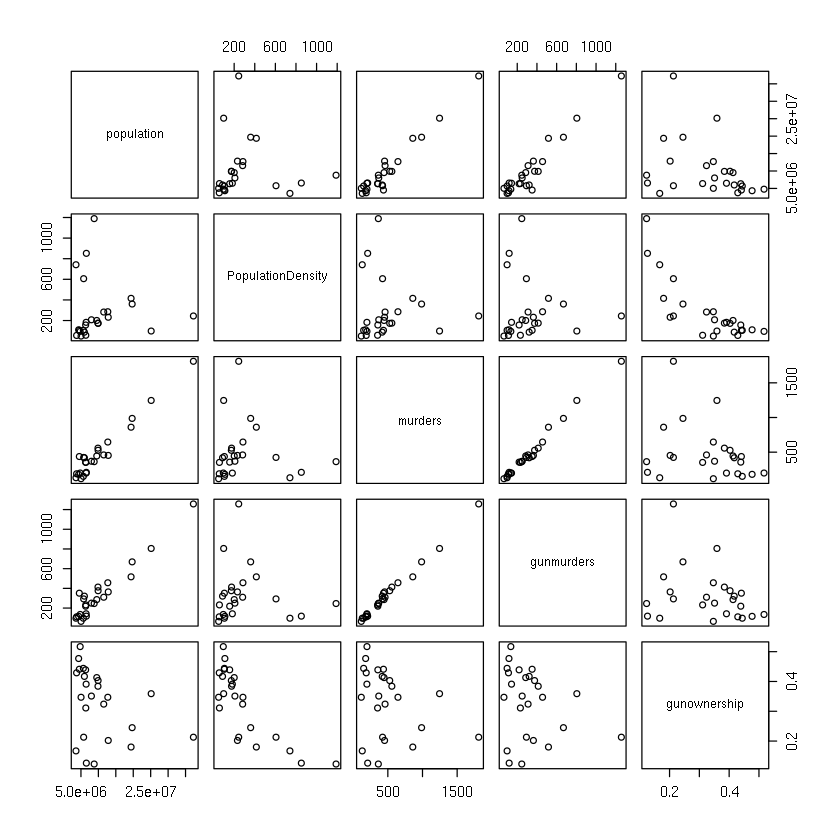

In [28]:
pairs(df[,-c(1,2,3)]) # tidak memasukan kolom no 1,2,3

In [37]:
dfsel <- df[,-c(1,2,3,4,5)] # hanya memasukan data kuantitatif

In [38]:
mat <- data.matrix(dfsel) # konversi data terseleksi ke matriks
mat <- t(mat)

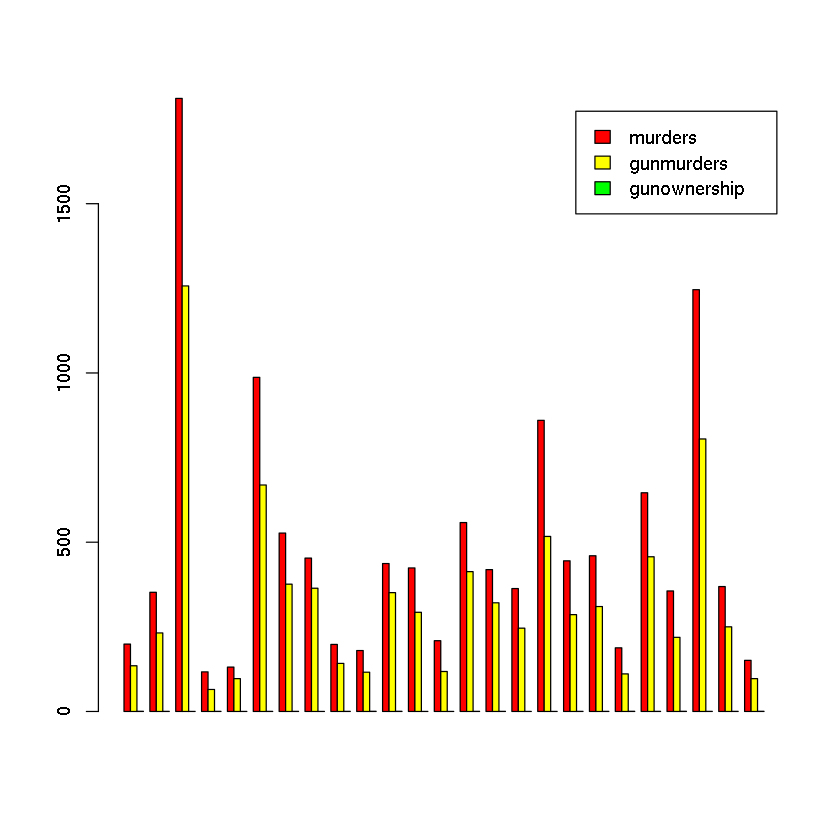

In [39]:
barplot(mat,
       col=c('red', 'yellow',
            'green'),
       beside=T,
       names.arg=dfsel$state,
       legend.text=T)